In [1]:
import pandas as pd # data processing
from termcolor import colored as cl # elegant printing of text
import seaborn as sb # visualizations
import matplotlib.pyplot as plt # editing visualizations
from matplotlib import style # setting styles for plots
from sklearn.preprocessing import StandardScaler # normalizing data
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.metrics import accuracy_score # algorithm accuracy
from sklearn.model_selection import train_test_split # splitting the data

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 7)

In [2]:
df=pd.read_csv(r"D:\Mtech Sem 1\ITC lab\TOR_database\Scenario-A\SelectedFeatures-10s-TOR-NonTOR.csv", nrows = 67827)
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [3]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('/', '')
df.columns = df.columns.str.strip()
df.columns

Index(['SourceIP', 'SourcePort', 'DestinationIP', 'DestinationPort',
       'Protocol', 'FlowDuration', 'FlowBytess', 'FlowPacketss', 'FlowIATMean',
       'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax',
       'BwdIATMin', 'ActiveMean', 'ActiveStd', 'ActiveMax', 'ActiveMin',
       'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin', 'label'],
      dtype='object')

In [4]:
df.describe()

,SourcePort,DestinationPort,Protocol,FlowDuration,FlowBytess,FlowPacketss,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,...,BwdIATMax,BwdIATMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
count,67827.000000,67827.000000,67827.000000,6.782700e+04,6.782700e+04,6.782700e+04,6.782700e+04,6.782700e+04,6.782700e+04,6.782700e+04,...,6.782700e+04,6.782700e+04,6.782700e+04,67827.0,6.782700e+04,6.782700e+04,6.782700e+04,67827.0,6.782700e+04,6.782700e+04
mean,37915.589854,11565.607767,12.167441,2.992193e+06,2.446832e+05,3.275231e+03,3.156252e+05,2.209890e+05,8.984784e+05,1.924630e+05,...,4.760707e+05,5.159108e+04,3.888057e+04,0.0,3.888057e+04,3.888057e+04,3.085372e+05,0.0,3.085372e+05,3.085372e+05
std,20985.017550,18373.208944,5.459392,4.063101e+06,5.131411e+06,4.896340e+04,6.988356e+05,6.409798e+05,1.738542e+06,5.780578e+05,...,1.409713e+06,4.873775e+05,3.154794e+05,0.0,3.154794e+05,3.154794e+05,1.454025e+06,0.0,1.454025e+06,1.454025e+06
min,21.000000,21.000000,6.000000,1.000000e+00,0.000000e+00,2.002581e-01,5.000000e-01,0.000000e+00,1.000000e+00,-2.255000e+03,...,0.000000e+00,-3.270000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,19305.000000,137.000000,6.000000,4.442000e+04,1.046553e+02,4.861703e+00,9.951695e+03,0.000000e+00,2.901500e+04,2.600000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,43680.000000,443.000000,17.000000,4.108590e+05,1.331217e+03,1.631441e+01,8.345000e+04,0.000000e+00,1.787690e+05,1.373000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,54685.000000,16311.000000,17.000000,7.328712e+06,2.168345e+04,1.007032e+02,4.106090e+05,5.793818e+04,4.642880e+05,2.075380e+05,...,8.281050e+04,1.700000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
max,65534.000000,65514.000000,17.000000,1.000000e+07,4.750000e+08,3.000000e+06,9.987113e+06,7.045491e+06,9.998126e+06,9.987113e+06,...,9.996903e+06,9.996903e+06,4.999893e+06,0.0,4.999893e+06,4.999893e+06,9.998126e+06,0.0,9.998126e+06,9.998126e+06


In [5]:
df = df.dropna(how='any',axis=0)
df.isnull().sum()

SourceIP           0
SourcePort         0
DestinationIP      0
DestinationPort    0
Protocol           0
FlowDuration       0
FlowBytess         0
FlowPacketss       0
FlowIATMean        0
FlowIATStd         0
FlowIATMax         0
FlowIATMin         0
FwdIATMean         0
FwdIATStd          0
FwdIATMax          0
FwdIATMin          0
BwdIATMean         0
BwdIATStd          0
BwdIATMax          0
BwdIATMin          0
ActiveMean         0
ActiveStd          0
ActiveMax          0
ActiveMin          0
IdleMean           0
IdleStd            0
IdleMax            0
IdleMin            0
label              0
dtype: int64

In [6]:
df.replace('Infinity', -1, inplace=True)
df["label"] = df["label"].map({"nonTOR": 0, "TOR": 1})
df["SourceIP"] = df["SourceIP"].apply(lambda x: float(x.replace(".", "")))
df["DestinationIP"] = df["DestinationIP"].apply(lambda x: float(x.replace(".", "")))
df.head(10)

,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,FlowDuration,FlowBytess,FlowPacketss,FlowIATMean,FlowIATStd,...,BwdIATMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,label
0,100215.0,53913,2.165821e+09,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,100215.0,53913,2.165821e+09,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,100215.0,53913,2.165821e+09,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,100215.0,53913,2.165821e+09,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,100215.0,53913,2.165821e+09,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,100215.0,53913,2.165821e+09,80,6,4841,0.0,413.137781,4841.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,100215.0,53913,2.165821e+09,80,6,581,0.0,3442.340792,581.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,100215.0,53913,2.165821e+09,80,6,906,0.0,2207.505519,906.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,100215.0,53913,2.165821e+09,80,6,401,0.0,4987.531172,401.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,100215.0,53913,2.165821e+09,80,6,760,0.0,2631.578947,760.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# drop rows having negative values 
index_names =df[  df["FlowIATMin"] < 0 ].index
df.drop(index_names, inplace = True)
print(df.min())

SourceIP           10806.000000
SourcePort            21.000000
DestinationIP       8888.000000
DestinationPort       21.000000
Protocol               6.000000
FlowDuration           1.000000
FlowBytess             0.000000
FlowPacketss           0.200258
FlowIATMean            0.500000
FlowIATStd             0.000000
FlowIATMax             1.000000
FlowIATMin             0.000000
FwdIATMean             0.000000
FwdIATStd              0.000000
FwdIATMax              0.000000
FwdIATMin              0.000000
BwdIATMean             0.000000
BwdIATStd              0.000000
BwdIATMax              0.000000
BwdIATMin              0.000000
ActiveMean             0.000000
ActiveStd              0.000000
ActiveMax              0.000000
ActiveMin              0.000000
IdleMean               0.000000
IdleStd                0.000000
IdleMax                0.000000
IdleMin                0.000000
label                  0.000000
dtype: float64


In [8]:
df.columns

Index(['SourceIP', 'SourcePort', 'DestinationIP', 'DestinationPort',
       'Protocol', 'FlowDuration', 'FlowBytess', 'FlowPacketss', 'FlowIATMean',
       'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax',
       'BwdIATMin', 'ActiveMean', 'ActiveStd', 'ActiveMax', 'ActiveMin',
       'IdleMean', 'IdleStd', 'IdleMax', 'IdleMin', 'label'],
      dtype='object')

In [9]:
df = df.astype("float64")

In [10]:
print("\n----------------------Minimum------------------\n")
print(df.min())

print("\n----------------------Maximum-----------------\n")
print(df.max())


----------------------Minimum------------------

SourceIP           10806.000000
SourcePort            21.000000
DestinationIP       8888.000000
DestinationPort       21.000000
Protocol               6.000000
FlowDuration           1.000000
FlowBytess             0.000000
FlowPacketss           0.200258
FlowIATMean            0.500000
FlowIATStd             0.000000
FlowIATMax             1.000000
FlowIATMin             0.000000
FwdIATMean             0.000000
FwdIATStd              0.000000
FwdIATMax              0.000000
FwdIATMin              0.000000
BwdIATMean             0.000000
BwdIATStd              0.000000
BwdIATMax              0.000000
BwdIATMin              0.000000
ActiveMean             0.000000
ActiveStd              0.000000
ActiveMax              0.000000
ActiveMin              0.000000
IdleMean               0.000000
IdleStd                0.000000
IdleMax                0.000000
IdleMin                0.000000
label                  0.000000
dtype: float64

------

In [11]:
#normalization 
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
df_max_scaled.head()


,SourceIP,SourcePort,DestinationIP,DestinationPort,Protocol,FlowDuration,FlowBytess,FlowPacketss,FlowIATMean,FlowIATStd,...,BwdIATMin,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,label
0,4.512011e-07,0.822672,0.008485,0.001221,0.352941,0.000044,0.0,0.001533,0.000044,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1,4.512011e-07,0.822672,0.008485,0.001221,0.352941,0.000026,0.0,0.002574,0.000026,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2,4.512011e-07,0.822672,0.008485,0.001221,0.352941,0.000089,0.0,0.000748,0.000089,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
3,4.512011e-07,0.822672,0.008485,0.001221,0.352941,0.000107,0.0,0.000621,0.000108,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
4,4.512011e-07,0.822672,0.008485,0.001221,0.352941,0.000031,0.0,0.002116,0.000032,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0


In [12]:
print("\n----------------------Minimum------------------\n")
print(df.min())

print("\n----------------------Maximum-----------------\n")
print(df.max())


----------------------Minimum------------------

SourceIP           10806.000000
SourcePort            21.000000
DestinationIP       8888.000000
DestinationPort       21.000000
Protocol               6.000000
FlowDuration           1.000000
FlowBytess             0.000000
FlowPacketss           0.200258
FlowIATMean            0.500000
FlowIATStd             0.000000
FlowIATMax             1.000000
FlowIATMin             0.000000
FwdIATMean             0.000000
FwdIATStd              0.000000
FwdIATMax              0.000000
FwdIATMin              0.000000
BwdIATMean             0.000000
BwdIATStd              0.000000
BwdIATMax              0.000000
BwdIATMin              0.000000
ActiveMean             0.000000
ActiveStd              0.000000
ActiveMax              0.000000
ActiveMin              0.000000
IdleMean               0.000000
IdleStd                0.000000
IdleMax                0.000000
IdleMin                0.000000
label                  0.000000
dtype: float64

------

In [13]:
df = df.drop(['ActiveStd', 'IdleStd'], axis = 1)


In [14]:
df.columns

Index(['SourceIP', 'SourcePort', 'DestinationIP', 'DestinationPort',
       'Protocol', 'FlowDuration', 'FlowBytess', 'FlowPacketss', 'FlowIATMean',
       'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax',
       'BwdIATMin', 'ActiveMean', 'ActiveMax', 'ActiveMin', 'IdleMean',
       'IdleMax', 'IdleMin', 'label'],
      dtype='object')

https://medium.com/codex/machine-learning-k-nearest-neighbors-algorithm-with-python-df94b374ad41

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


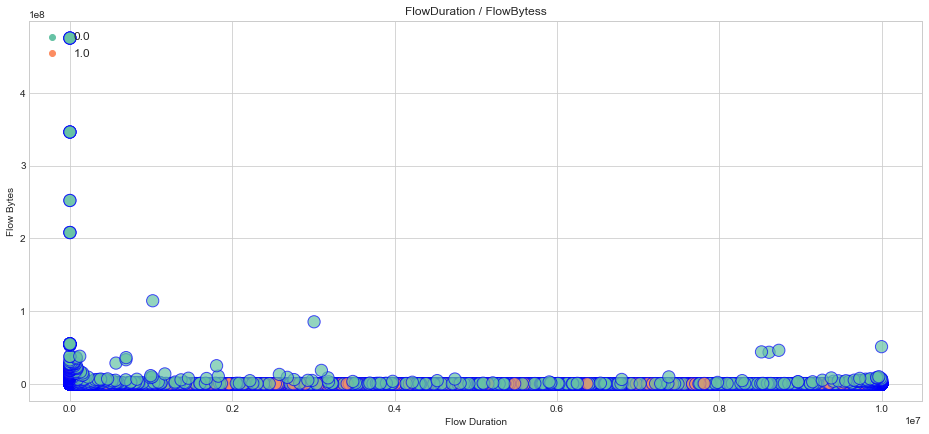

In [15]:

sb.scatterplot('FlowDuration', 'FlowBytess', data = df, hue = 'label', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('FlowDuration / FlowBytess')
plt.xlabel('Flow Duration')
plt.ylabel('Flow Bytes')
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('flow.png')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


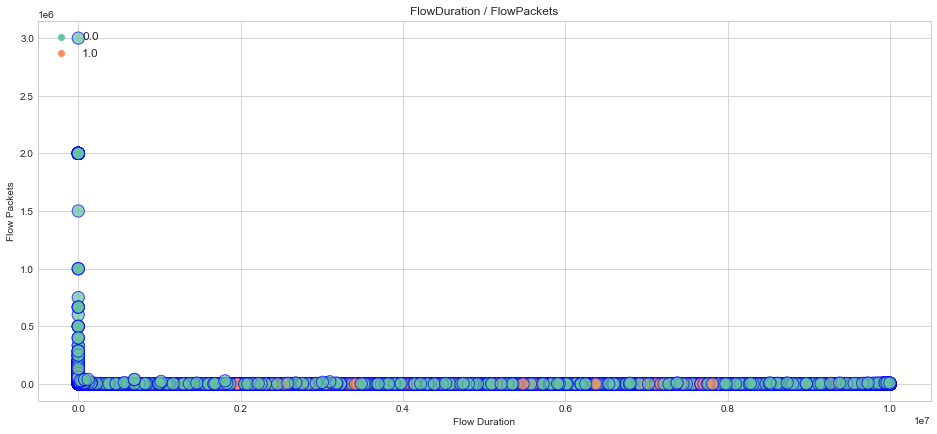

In [16]:
sb.scatterplot('FlowDuration', 'FlowPacketss', data = df, hue = 'label', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('FlowDuration / FlowPackets')
plt.xlabel('Flow Duration')
plt.ylabel('Flow Packets')
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('flow1.png')

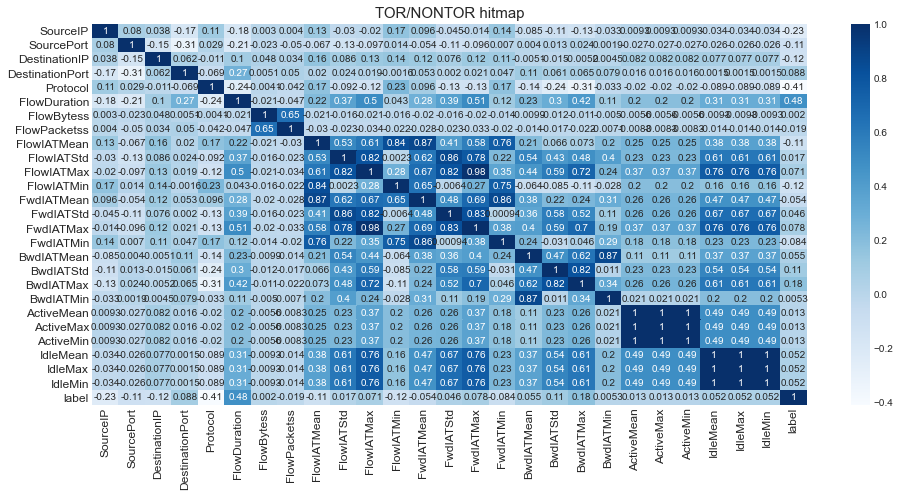

In [17]:
# 3. Data Heatmap

df_corr = df.corr()

sb.heatmap(df_corr, cmap = 'Blues', annot = True, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values)
plt.title('TOR/NONTOR hitmap', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('heatmap.png')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


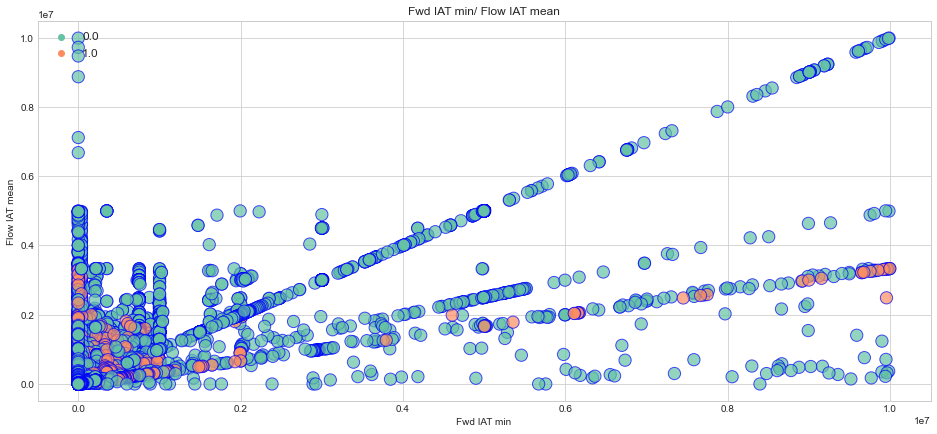

In [18]:
sb.scatterplot('FwdIATMin', 'FlowIATMean', data = df, hue = 'label', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('Fwd IAT min/ Flow IAT mean')
plt.xlabel('Fwd IAT min')
plt.ylabel('Flow IAT mean')
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('flowIAT_vs_FwdIAT.png')

In [19]:
X_var = df.drop('label', axis = 1)
y_var = df['label']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)       # no random shuffling 

print(cl('Train set shape :', attrs = ['bold']), X_train.shape, y_train.shape)
print(cl('Test set shape :', attrs = ['bold']), X_test.shape, y_test.shape)

Train set shape : (47158, 26) (47158,)
Test set shape : (20211, 26) (20211,)


In [21]:
# k value = 3   

k = 3

neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train, y_train)

print(cl(neigh, attrs = ['bold']))

KNeighborsClassifier(n_neighbors=3)


In [22]:
yhat = neigh.predict(X_test)

print(cl('Prediction Accuracy Score (%) :', attrs = ['bold']), round(accuracy_score(y_test, yhat)*100, 2))

Prediction Accuracy Score (%) : 99.96


In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,yhat), "\n")
print(classification_report(y_test,yhat))

[[17917     8]
 [    1  2285]] 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17925
         1.0       1.00      1.00      1.00      2286

    accuracy                           1.00     20211
   macro avg       1.00      1.00      1.00     20211
weighted avg       1.00      1.00      1.00     20211

